In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
edge_list = [(1,2), (2, 3), (2, 5), (3, 4), (3, 6), (4, 7), (6, 7)]

Créer un graphe non dirigé

In [3]:
import networkx as nx

In [4]:
G_u = nx.Graph(edge_list)

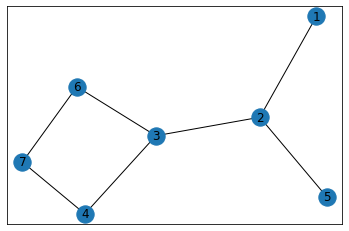

In [5]:
nx.draw_networkx(G_u, with_labels=True)

In [6]:
G_u.degree

DegreeView({1: 1, 2: 3, 3: 3, 5: 1, 4: 2, 6: 2, 7: 2})

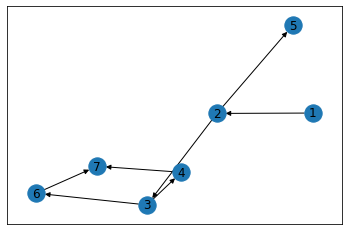

In [7]:
G_d = nx.DiGraph(edge_list)
nx.draw_networkx(G_d, with_labels=True)

In [8]:
G_d.degree

DiDegreeView({1: 1, 2: 3, 3: 3, 5: 1, 4: 2, 6: 2, 7: 2})

In [9]:
G_d.in_degree, G_d.out_degree

(InDegreeView({1: 0, 2: 1, 3: 1, 5: 1, 4: 1, 6: 1, 7: 2}),
 OutDegreeView({1: 1, 2: 2, 3: 2, 5: 0, 4: 1, 6: 1, 7: 0}))

In [10]:
G_d.add_edge(5,2)

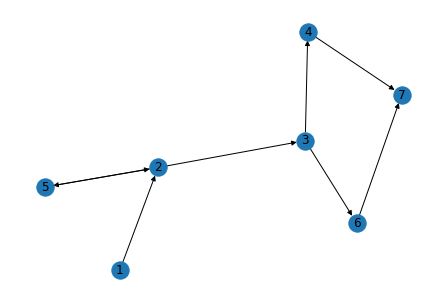

In [11]:
nx.draw(G_d, with_labels=True)

In [12]:
G_u.adjacency()

In [13]:
A_u = nx.linalg.adjacency_matrix(G_u).todense()

In [14]:
A_d = nx.linalg.adjacency_matrix(G_d).todense()

In [15]:
A_d

matrix([[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0],
        [0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0]])

In [16]:
A_u

matrix([[0, 1, 0, 0, 0, 0, 0],
        [1, 0, 1, 1, 0, 0, 0],
        [0, 1, 0, 0, 1, 1, 0],
        [0, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 1],
        [0, 0, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 1, 0]])

In [17]:
A = np.array([[0, 1, 0, 0],
              [1, 0, 1, 1],
              [0, 1, 0, 1],
              [0, 1, 1, 0]
             ])

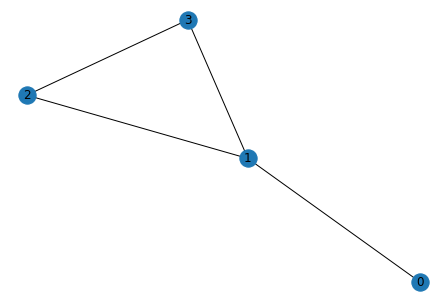

In [18]:
G = nx.Graph(A)
nx.draw(G, with_labels=True)

Si je suis en 0, comment savoir si je peux aller en 3  en 1 pas ?

In [19]:
A[0,3]

0

Si je suis en 0, représenter par un vecteur tous les noeuds où je peux aller

In [20]:
A[0,:]

array([0, 1, 0, 0])

Représenter par un vecteur que je suis en 1, représenter par une opération le vecteur tous les noeuds où je peux aller

In [21]:
u_0 = np.array([0, 1, 0, 0])
u_0 @ A

array([1, 0, 1, 1])

Représenter par un vecteur que je suis en 1 et en 0, représenter par une opération le vecteur tous les noeuds où je peux aller

In [22]:
u_0 = np.array([1, 1, 0, 0])
u_0 @ A

array([1, 1, 1, 1])

Comment représenter où je peux aller à partir de 0 en 3 pas (et combien de fois)

In [23]:
u_0 = np.array([1, 0, 0, 0])
u_0 @ A @ A @ A

array([0, 3, 1, 1])

Recommencer avec des graphes particuliers de 4 noeuds: 
- ligne
- cercle
- clique (graphe complet)
- étoile

On fait une fonction avance qui prend en argument un vecteur, une matrice d'adjacence et un nombre de pas et affiche l'évolution du vecteur à chaque pas.

In [24]:
circle=np.array([
    [0,1,0,1],
    [1,0,1,0],
    [0,1,0,1],
    [1,0,1,0]
])
line=np.array([
    [0,1,0,0],
    [1,0,1,0],
    [0,1,0,1],
    [0,0,1,0]
])
clique=np.array([
    [0,1,1,1],
    [1,0,1,1],
    [1,1,0,1],
    [1,1,1,0]
])
star = np.array([
    [0,1,1,1],
    [1,0,0,0],
    [1,0,0,0],
    [1,0,0,0]
])

mats = {"star":star, "circle":circle, "line":line, "clique":clique}

In [25]:
from ipywidgets import interact


In [26]:
debs = {i: np.eye(4)[i,:] for i in range(4)}

def avance(deb, mat, nbpas):
    u = debs[deb].copy()
    m = mats[mat]
    for _ in range(nbpas):
        u = u@m
    G = nx.Graph(m)
    nx.draw_circular(G,
            cmap=plt.get_cmap('Reds'), 
            node_color=u, 
            with_labels=True)
    plt.show()
    

interact(
    avance,
    deb=debs.keys(),
    mat=mats.keys(),
    nbpas=(1,5)
)

interactive(children=(Dropdown(description='deb', options=(0, 1, 2, 3), value=0), Dropdown(description='mat', …

<function __main__.avance(deb, mat, nbpas)>

In [27]:
debs

{0: array([1., 0., 0., 0.]),
 1: array([0., 1., 0., 0.]),
 2: array([0., 0., 1., 0.]),
 3: array([0., 0., 0., 1.])}

In [28]:
[np.eye(4)[i,:] for i in range(4)]

[array([1., 0., 0., 0.]),
 array([0., 1., 0., 0.]),
 array([0., 0., 1., 0.]),
 array([0., 0., 0., 1.])]